In [ ]:
# https://machinelearningmastery.com/what-is-bayesian-optimization/

In [ ]:
# Sample -> vector, hyperparameter values
# Search Space
# Objective Function
# Cost

In [ ]:
# Algorithm Training -> optimize parameters
# Algorithm Tuning -> optimizae hyperparameters
# Predictive Modeling -> optimize data preparation steps

In [ ]:
# random search
# grid search
# 

In [ ]:
# surrogate function
# acquisition function


In [9]:
import numpy as np
import seaborn as sns
sns.set()

In [2]:
# Objective function
def objective(x, noise=0.1):
    noise = np.random.normal(loc=0, scale=noise)
    return (x**2 * np.sin(5 * np.pi * x)**6.0) + noise

In [71]:
# grid based sample
X = np.arange(0, 1, 0.01)

In [72]:
X

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [73]:
# sample the domain without noise
y = [objective(x, 0) for x in X]

<AxesSubplot:>

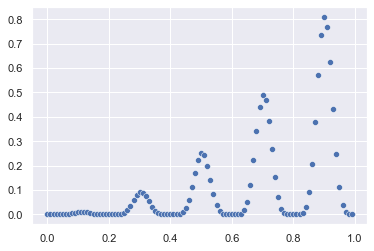

In [10]:
sns.scatterplot(x=X, y=y)

In [11]:
# find the best result
ix = np.argmax(y) # the index of the y max
print(f"Optimum: x={X[ix]}, y={y[ix]}")

Optimum: x=0.9, y=0.81


In [12]:
# sampel the domain with noise
y_noise = [objective(x) for x in X]

<AxesSubplot:>

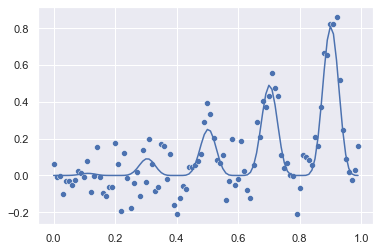

In [18]:
sns.scatterplot(x=X, y=y_noise)
sns.lineplot(x=X, y=y)

In [ ]:
# ---------------------- #
# surrogate function
# ---------------------- #

# Gaussian Process (GP)
# Random Forest

# Radial Basis Function (RBF)

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor

model = GaussianProcessRegressor()

In [28]:
model.fit(np.array(X).reshape(-1, 1), np.array(y).reshape(-1,1))

GaussianProcessRegressor()

In [38]:
len(X)

100

In [30]:
yhat = model.predict(np.array(X).reshape(-1,1), return_std=True)

In [33]:
yhat[0]

array([[-0.00068972],
       [-0.00525361],
       [-0.00711668],
       [-0.00694931],
       [-0.00532195],
       [-0.0027208 ],
       [ 0.00044566],
       [ 0.00385055],
       [ 0.00722614],
       [ 0.01036602],
       [ 0.01311997],
       [ 0.0153833 ],
       [ 0.01709428],
       [ 0.01822501],
       [ 0.01878327],
       [ 0.01879746],
       [ 0.01832056],
       [ 0.01742154],
       [ 0.01618594],
       [ 0.01469845],
       [ 0.01306033],
       [ 0.01137108],
       [ 0.00972778],
       [ 0.00822848],
       [ 0.00696516],
       [ 0.00601768],
       [ 0.00546318],
       [ 0.0053674 ],
       [ 0.00578022],
       [ 0.0067476 ],
       [ 0.00829744],
       [ 0.01044428],
       [ 0.01319194],
       [ 0.01652962],
       [ 0.02043688],
       [ 0.02487755],
       [ 0.02980882],
       [ 0.03517449],
       [ 0.04090768],
       [ 0.04693967],
       [ 0.05318993],
       [ 0.05957568],
       [ 0.06600714],
       [ 0.07239866],
       [ 0.07865787],
       [ 0

In [34]:
yhat[1] # I imagine that this is the standard dev of the prediction

array([6.48909214e-06, 4.98523464e-06, 3.97771699e-06, 3.40226502e-06,
       3.14587477e-06, 3.06974771e-06, 3.06225207e-06, 3.05909625e-06,
       3.03365831e-06, 2.98043712e-06, 2.90477107e-06, 2.81590551e-06,
       2.72430558e-06, 2.63876804e-06, 2.56609505e-06, 2.50997222e-06,
       2.47087584e-06, 2.44717266e-06, 2.43539411e-06, 2.43140197e-06,
       2.43094531e-06, 2.43071695e-06, 2.42815782e-06, 2.42163355e-06,
       2.41053630e-06, 2.39505748e-06, 2.37590593e-06, 2.35454851e-06,
       2.33182939e-06, 2.30941559e-06, 2.28874754e-06, 2.27050866e-06,
       2.25549639e-06, 2.24402285e-06, 2.23581980e-06, 2.23064958e-06,
       2.22796031e-06, 2.22688868e-06, 2.22671418e-06, 2.22691361e-06,
       2.22683882e-06, 2.22609085e-06, 2.22436956e-06, 2.22207243e-06,
       2.21902257e-06, 2.21576810e-06, 2.21230811e-06, 2.20924477e-06,
       2.20713312e-06, 2.20600104e-06, 2.20597588e-06, 2.20713312e-06,
       2.20939553e-06, 2.21240848e-06, 2.21559272e-06, 2.21907260e-06,
      

In [37]:
from warnings import catch_warnings, simplefilter
import matplotlib.pyplot as plt

In [36]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warnings generated when making a prediction
    with catch_warnings():
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [47]:
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    sns.scatterplot(x=X, y=y)
    # plt.scatter(X, y)
    Xsamples = np.asarray(np.arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    plt.plot(Xsamples, ysamples)
    plt.show()

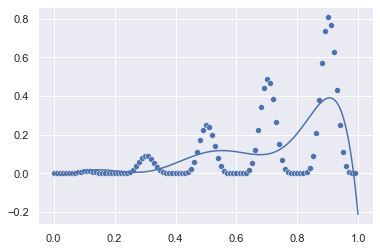

In [48]:
plot(X, y, model)

In [ ]:
# ------------------- #
# Acquisition Function
# ------------------- #

# Probability of Improvement (PI)
# Expected Improvement (EI)
# Lower Confidence Bound (LCB)

In [58]:
import scipy as sci

In [62]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = surrogate(model, X)
    best = np.max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    mu = mu[:,0]
    # calcualte the probability of improvement
    probs = sci.stats.norm.cdf((mu - best)/(std+1E-9))
    return probs

In [63]:
# Optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = np.random.random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    ix = np.argmax(scores)
    return Xsamples[ix, 0]


In [64]:
model

GaussianProcessRegressor()

In [74]:
X = X.reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [75]:
# perform the optimization process
for i in range(100):
    # select the next point to sample
    x = opt_acquisition(X, y, model)
    # sample the point
    actual = objective(x)
    # summarize the finding for our own reporting
    est, _ = surrogate(model, [[x]])
    print(f"x = {x}, f() = {est}, actual = {actual}")
    # add the data to the dataset
    X = np.vstack((X, [[x]]))
    y = np.vstack((y, [[actual]]))
    # update the model
    model.fit(X, y)

x = 0.9074614478950853, f() = [[0.3906585]], actual = 1.0142420153334513
x = 0.9059212350575085, f() = [[0.44284344]], actual = 0.8492965851103056
x = 0.907726532475417, f() = [[0.47418594]], actual = 0.6839743062026037
x = 0.23183588421676904, f() = [[0.00373125]], actual = -0.03454674274462552
x = 0.9082380175432464, f() = [[0.48933655]], actual = 0.8240270767749932
x = 0.4426859963859955, f() = [[0.09005547]], actual = 0.020981960606963605
x = 0.9074995266007003, f() = [[0.51143289]], actual = 0.8332838842619601
x = 0.5056984413435103, f() = [[0.12148333]], actual = 0.2943154799728516
x = 0.9081635291849786, f() = [[0.53258681]], actual = 0.9145738053813148
x = 0.9125049603854941, f() = [[0.55424547]], actual = 0.8141583500534908
x = 0.16448755464545983, f() = [[0.01985025]], actual = -0.055525536136834204
x = 0.9090082773255849, f() = [[0.56965137]], actual = 0.7792012468672599
x = 0.4878018256235779, f() = [[0.1279254]], actual = 0.2180847265683767
x = 0.0021740401238700136, f() =

In [ ]:
# Scikit-Optimize
# 
# https://github.com/scikit-optimize/scikit-optimize
# https://github.com/hyperopt/hyperopt


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

In [78]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2)
# define the model
model = KNeighborsClassifier()

In [80]:
# define the space of hyperparametrs to search
search_space = [Integer(1, 5, name="n_neighbors"), Integer(1,2, name="p")]

In [82]:
# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    # something
    model.set_params(**params)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring="accuracy")
    # calculate the mean of the scores
    estimate = np.mean(result)
    
    return 1.0 - estimate

In [83]:
# perform optimization
result = gp_minimize(evaluate_model, search_space)

c:\Users\william.suzuki\Documents\statistical-learning\handson_machine_learning\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\william.suzuki\Documents\statistical-learning\handson_machine_learning\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\william.suzuki\Documents\statistical-learning\handson_machine_learning\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\william.suzuki\Documents\statistical-learning\handson_machine_learning\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The obj

In [84]:
# summirizing findings:
print(f"Best Accuracy: {1 - result.fun}")
print(f"Best Parameters: n_neighbors={result.x[0]}, p = {result.x[1]}")

Best Accuracy: 1.0
Best Parameters: n_neighbors=4, p = 1


In [ ]:
# https://arxiv.org/abs/1012.2599
# https://proceedings.neurips.cc/paper/2012/hash/05311655a15b75fab86956663e1819cd-Abstract.html
# https://arxiv.org/abs/1807.02811

In [ ]:
# I need to review this notebook